### Import necessary libraries

In [209]:
import pandas as pd

In [210]:
import numpy as np

In [211]:
import matplotlib.pyplot as plt

In [212]:
import seaborn as sns

## Task1:  Read the data and clean up

#### Read books

In [213]:
books=pd.read_csv("./Data/Book_reviews/BX-Books.csv", engine="python", sep=',', quotechar='"' )
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN,NaN


#### Read users

In [214]:
users=pd.read_csv("./Data/Book_reviews/BX-Users.csv", engine="python", sep=',', quotechar='"' )
users.head()

,User-ID,Location,Age,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18,NaN,NaN,NaN
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN


#### Read ratings

In [215]:
ratings=pd.read_csv("./Data/Book_reviews/BX-Book-Ratings.csv", engine="python", sep=',', quotechar='"' )
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


#### Table cleaning

In [216]:
users = users.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
print(users)

        User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
1             2           stockton, california, usa   18
2             3     moscow, yukon territory, russia  NaN
3             4           porto, v.n.gaia, portugal   17
4             5  farnborough, hants, united kingdom  NaN
...         ...                                 ...  ...
278846   278854               portland, oregon, usa  NaN
278847   278855  tacoma, washington, united kingdom   50
278848   278856           brampton, ontario, canada  NaN
278849   278857           knoxville, tennessee, usa  NaN
278850   278858                dublin, n/a, ireland  NaN

[278851 rows x 3 columns]


In [217]:
books = books.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10', 'Unnamed: 11'], axis=1)
print(books)

              ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bru

In [218]:
b=books[pd.to_numeric(books['Year-Of-Publication'], errors='coerce').notnull()]

In [219]:
ratings = ratings[(ratings[['Book-Rating']] != 0).all(axis=1)]


In [220]:
indexes = books[books['Book-Author'].str.contains(r'[0-9]')==True].index
books.drop(indexes, inplace=True, axis=0)

In [221]:
indexes2 = books.index[books['Year-Of-Publication'].str.contains(r'[a-zA-Z]')==True]
books.drop(indexes2, 0, inplace=True)

In [222]:
books['Year-Of-Publication'].astype('int64')

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271374    1988
271375    1991
271376    2004
271377    1996
271378    2000
Name: Year-Of-Publication, Length: 271117, dtype: int64

In [223]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [224]:
indexZeros = books[ books['Year-Of-Publication'] == 0 ].index
books.drop(indexZeros , inplace=True)

In [225]:
indexYear = books[ books['Year-Of-Publication'] > 2020 ].index
books.drop(indexYear , inplace=True)

### Augment data with additional columns

##### Add Country column in users data

In [226]:
users['Country']=users['Location'].str.split(',').str[2]
users['Country']=users['Country'].astype('str')
users.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


### Analysis

#### Question 1: Which publisher has the least books?

In [227]:
publisher=books['Publisher'].value_counts()
print(publisher)

Harlequin             7536
Silhouette            4220
Pocket                3868
Ballantine Books      3761
Bantam Books          3641
                      ... 
Klopp                    1
Tamarisk                 1
Aegina Pr                1
ORAFA Pub. Co            1
NK Lawn and Garden       1
Name: Publisher, Length: 16374, dtype: int64


#### Question 2: Which year has maximum number of publicised books?

In [228]:
year=b['Year-Of-Publication'].value_counts()
print(year)

2002    17616
1999    17416
2001    17349
2000    17223
1998    15749
        ...  
1904        1
2038        1
1917        1
1919        1
1378        1
Name: Year-Of-Publication, Length: 116, dtype: int64


#### Question 3: Which country has the most users?

In [229]:
country=users['Country'].value_counts()
print(country)

 usa               139184
 canada             21558
 united kingdom     18287
 germany            17022
 spain              13103
                    ...  
 evil empire            1
 nh                     1
 algérie                1
 courtenay              1
 canarias               1
Name: Country, Length: 1029, dtype: int64


#### Question 4: Which books are Top 10? 

In [230]:
best_book=pd.merge(ratings, books, on='ISBN', how='inner')


In [231]:
x=best_book.groupby('Book-Title')['Book-Rating'].mean()
sorted_data = x.sort_values( ascending=False)
sorted_data.head(10)

Book-Title
Orvis Fly Fishing Guide (Nick Lyons Books)                             10.0
New Kid in School (Lizzie McGuire, #6)                                 10.0
The Velveteen Rabbit (Creative Editions)                               10.0
Ezra Nehemiah (Collegeville Bible Commentary Old Testament 11)         10.0
New Improved!: Dykes to Watch Out for (Dykes to Watch Out for)         10.0
Ezekiel, Daniel (Collegeville Bible Commentary. Old Testament ; 16)    10.0
Eyewitness: Titanic                                                    10.0
Eyewitness: Renaissance (Eyewitness Books)                             10.0
Eyewitness: Music                                                      10.0
Eyewitness: American Revolution (Eyewitness Books)                     10.0
Name: Book-Rating, dtype: float64

#### Question 5: Which publisher has the best books? (by book rating)

In [232]:
publisher=best_book.groupby('Publisher')['Book-Rating'].mean()
sort_publishers=publisher.sort_values( ascending=False)
sort_publishers.head(1)

Publisher
 Editions P. Terrail    10.0
Name: Book-Rating, dtype: float64

#### Question 6:Which centry has the most published books?

In [247]:
centry=books.groupby(pd.cut(books['Year-Of-Publication'], np.arange(1300,2020,100))).count()
centry

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,,
"(1300, 1400]",2,2,2,2,2,2,2,2
"(1400, 1500]",0,0,0,0,0,0,0,0
"(1500, 1600]",0,0,0,0,0,0,0,0
"(1600, 1700]",0,0,0,0,0,0,0,0
"(1700, 1800]",0,0,0,0,0,0,0,0
"(1800, 1900]",5,5,5,5,5,5,5,5
"(1900, 2000]",211281,211281,211280,211281,211281,211281,211281,211270


Text(0, 0.5, 'Number of books')

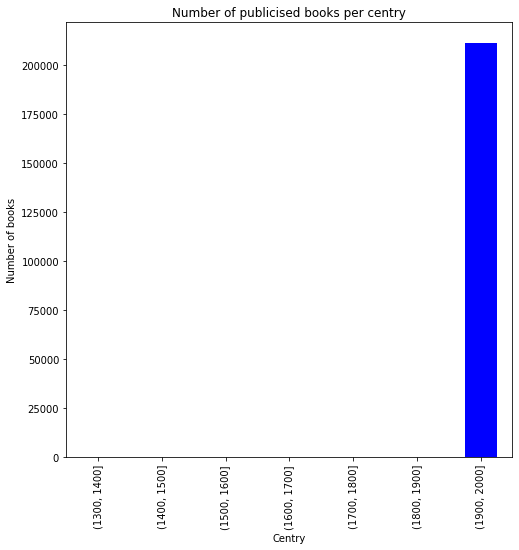

In [294]:
centries=['1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000']
ax = centry.plot(kind='bar', legend=False, color='blue',figsize=(8,8))
ax.set_title('Number of publicised books per centry')
ax.set_xlabel('Centry')
ax.set_ylabel('Number of books')

#### Question 7: Number of publicised books by publisher - ranged top 15 publishers



In [295]:
publ = books.groupby(['Publisher'])
p = publ['Book-Title'].count().sort_values()
p = p.tail(15)

Text(0, 0.5, 'Number of books')

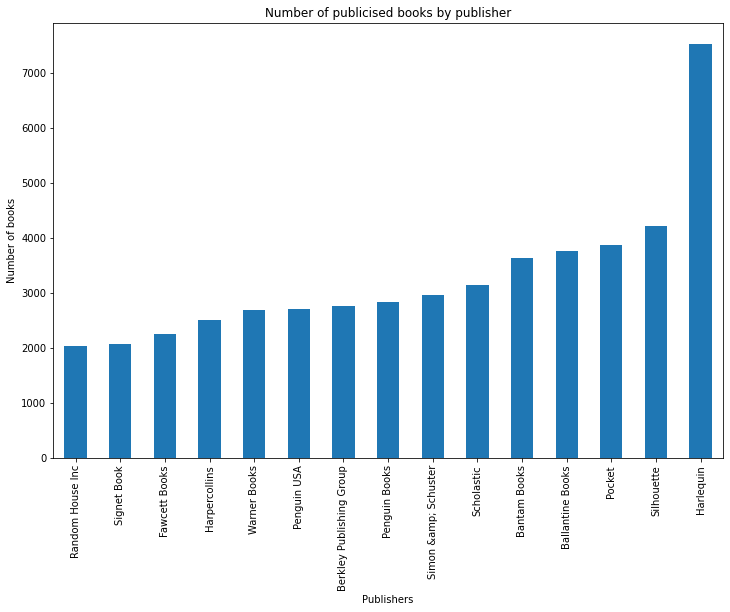

In [296]:
plt.figure(figsize=(12, 8))
ax = p.plot(kind='bar')
ax.set_title('Number of publicised books by publisher')
ax.set_xlabel('Publishers')
ax.set_ylabel('Number of books')